In [1]:
import sys
sys.path.append("..") # this adds to path parent directory in order to import utils file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from tqdm import tqdm
import numpy as np
import os
import seaborn as sns
import matplotlib.backends.backend_pdf
plt.ion()
plt.show()

## Utils functions

In [2]:
def getResultsDataset(datasets, path, method = 'louvain'):
    results = []
    for dataset in datasets:
        if method  in ['louvain', 'gmm', 'seurat']:
            resultsFile = f'{path}{dataset}_{method}_results.pkl'
            results.append(pd.read_pickle(resultsFile))
    results = pd.concat(results)
    return results

def plotResults(results, randIndexColumn= '_rand_index', datasetColumn = 'dataset', filename = None):
    def plotFeature(column, randIndexColumn, datasetColumn, pdf):
        if np.issubdtype(results[column].dtype, np.number):
            g = sns.FacetGrid(results, col=datasetColumn, margin_titles=True, height=3, col_wrap=3)
            g.map(sns.kdeplot, column, randIndexColumn, shade=True);
        else:
            g = sns.catplot(x=column, y=randIndexColumn, hue=datasetColumn,
                            data=results, kind = 'violin', height = 4, aspect=3);
            plt.xticks(rotation = 90);

        g.fig.suptitle(f"Distribution of {column}")
        g.fig.subplots_adjust(top=0.85)
        if pdf is not None:
            pdf.savefig(bbox_inches="tight")
        plt.show()
        
    # convert values to numeric if needed
    for column in results.columns:
        try:
            numericCol = pd.to_numeric(results[column])
            results[column] = numericCol
        except:
            ;
    features = np.setdiff1d(results.columns, [randIndexColumn, datasetColumn])
    
    # Plotting
    if filename is not None:    
        pdf = matplotlib.backends.backend_pdf.PdfPages(f"{filename}")
    else: 
        pdf= None
    for column in features:
        plotFeature(column, randIndexColumn, datasetColumn, pdf)
    if pdf is not None:
        pdf.close()
    

In [3]:
datasets = ['brainCIDR', 'pancreaticIsletCIDR', 'deng', 'sce10x_qc', 'sce2_qc', 'sce8_qc']

# Louvain

In [ ]:
method = 'louvain'
results = getResultsDataset(datasets,  path = 'gmm/data/', method = method)
results.shape, results['dataset'].value_counts()

In [ ]:
plotResults(results, filename = f"reports/{method}.pdf")

# GMM

In [35]:
method = 'gmm'
results = getResultsDataset(datasets, path = 'gmm/data/', method = method)
results.shape, results['dataset'].value_counts()

((2627, 15), brainCIDR              500
 sce10x_qc              472
 sce8_qc                465
 sce2_qc                463
 deng                   408
 pancreaticIsletCIDR    319
 Name: dataset, dtype: int64)

/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


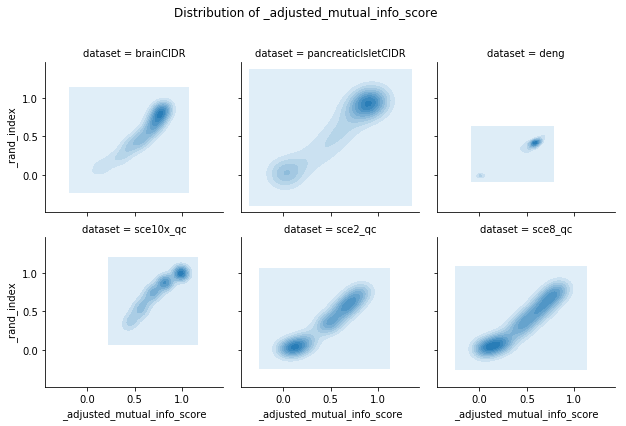

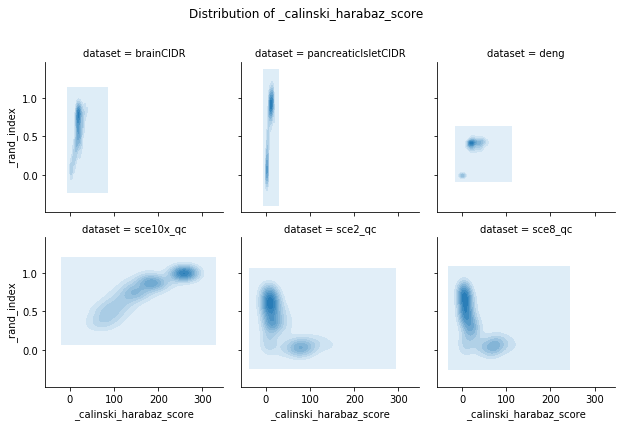

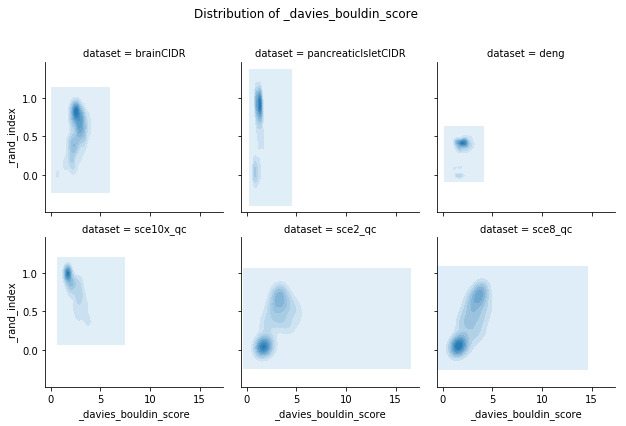

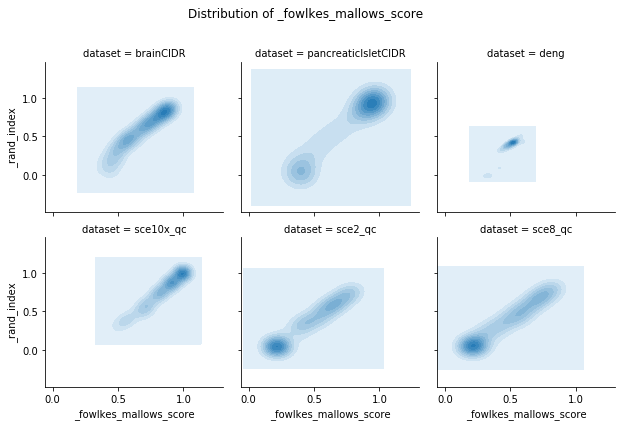

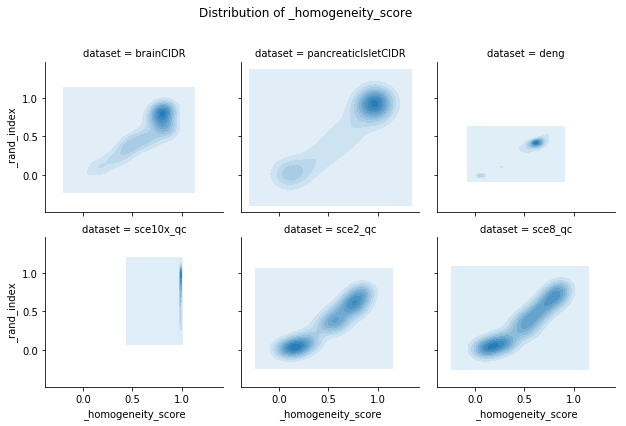

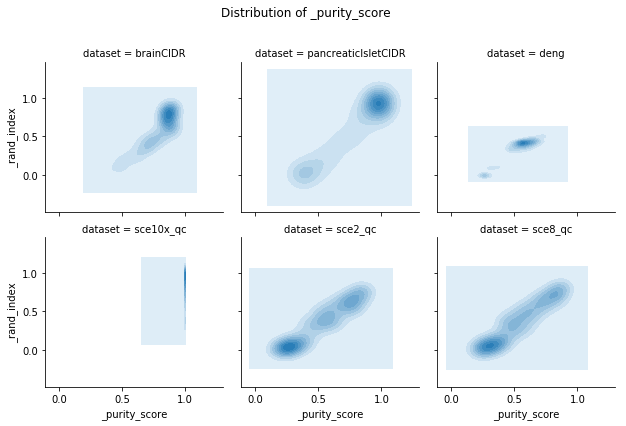

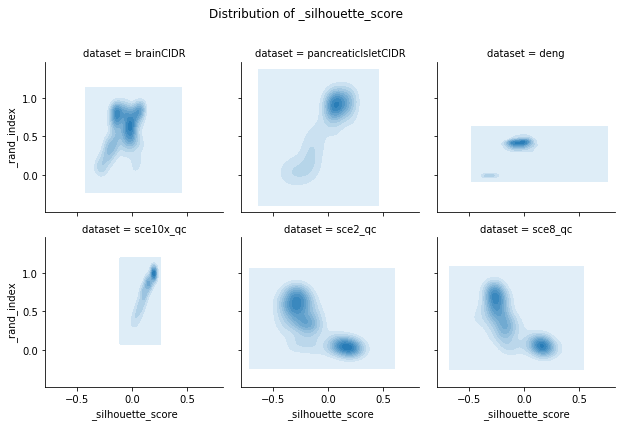

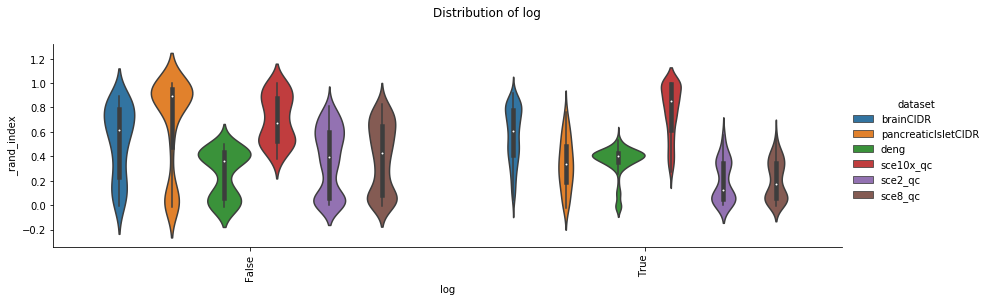

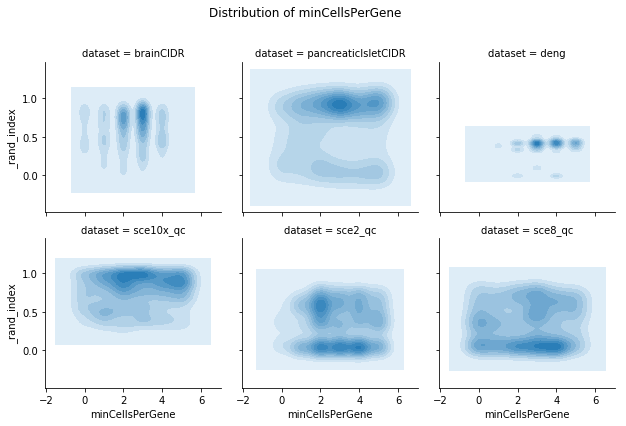

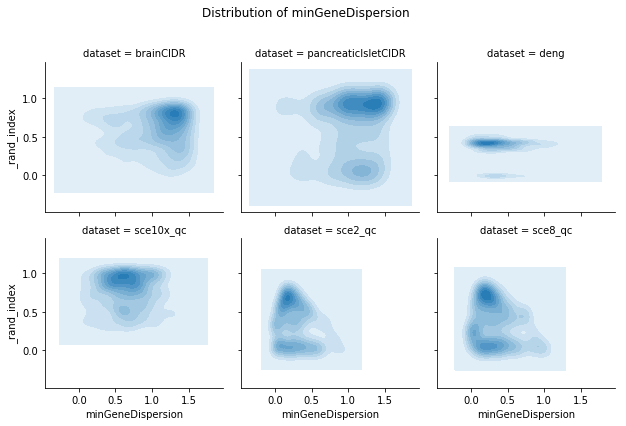

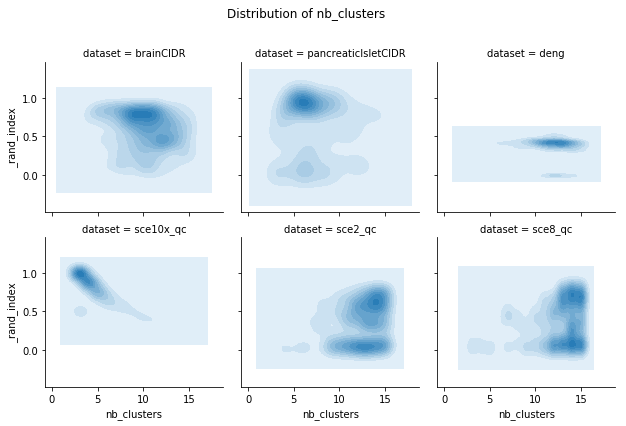

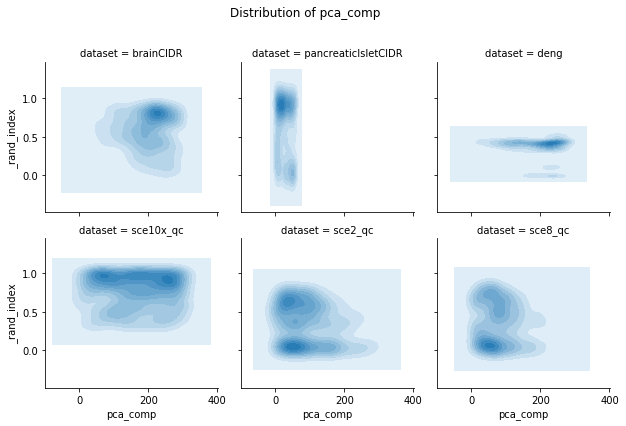

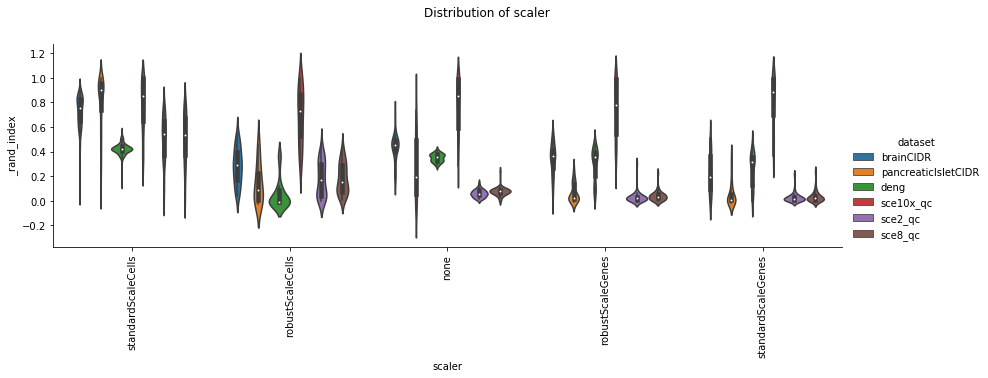

In [36]:
plotResults(results, filename = f"reports/{method}.pdf") #f"{method}.pdf"

# Seurat

In [ ]:
method = 'seurat'
results = getResultsDataset(datasets, path = 'seurat/data/', method = method)
results.shape, results['load_inputDataset'].value_counts()

In [ ]:
results.drop(['#clusters', 'preprocess_verbosity'], axis =1, inplace = True)

In [ ]:
plotResults(results, filename = f"reports/{method}.pdf", datasetColumn = 'load_inputDataset') #f"{method}.pdf"

In [ ]:
x = results[results['load_inputDataset'] == 'sce2_qc']['preprocess_teta_total_features']
y= results[results['load_inputDataset'] == 'sce2_qc']['_rand_index']

In [ ]:
results[results['load_inputDataset'] == 'sce2_qc']['preprocess_teta_total_features']

In [ ]:
results[results['load_inputDataset'] == 'sce2_qc']['preprocess_teta_total_features']